In [1]:
import numpy as np
import matplotlib.pyplot as plt

# To improve Aesthetics of plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

## **FITS**
Flexible Image Transport System (FITS) is a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables.

FITS is an open standard that is freely available for adoption, implementation and updates.

FITS is the most commonly used digital file format in astronomy.  

Running the code below, opens the fits file ("dss2ir.fits") and stores it. To learn more about FITS File Handling: [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html#module-astropy.io.fits)

In [2]:
from astropy.io import fits
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

The above open() function returns an object called as **HDU List**, which is a **List**  of Header Data Unit (HDU) objects, i.e. when a FITS file is opened, a `HDUList` object is returned.

This is the top-level component of the FITS file structure.  

Learn more about the FITS object by running the cell below. 

In [6]:
hdu = fits.open('data/dss2ir.fits')

In [7]:
hdu

In [8]:
hdu.info()

Filename: data/dss2ir.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     134   (600, 600)   float32   


A useful method in HDUList Class isHDUList.info(), which summarizes the content of the opened FITS file. 

The first element in HDU is the Primary HDU, i.e. `hdul[0]` is the primary HDU. 

Rest are secondary, if any.

Every Header Data Unit (HDU) normally has two components: 
1. Header 
2. Data array or table

In astropy these two components are accessed through, `"hdu.header"` and `"hdu.data"`

FITS image headers can contain information about one or more scientific coordinate systems that are overlaid on the image itself. Images contain an implicit Cartesian coordinate system that describes the location of each pixel in the image, but scientific uses usually require working in 'world' coordinates, for example the celestial coordinate system.

In [9]:
hdu[0].header

SIMPLE  =                    T / Written by SkyView Wed Jun 30 06:16:55 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =   202.46957500000002 / Reference longitude                            
CRVAL2  =    47.19525800000001 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [10]:
data = hdu[0].data
type(data)

numpy.ndarray

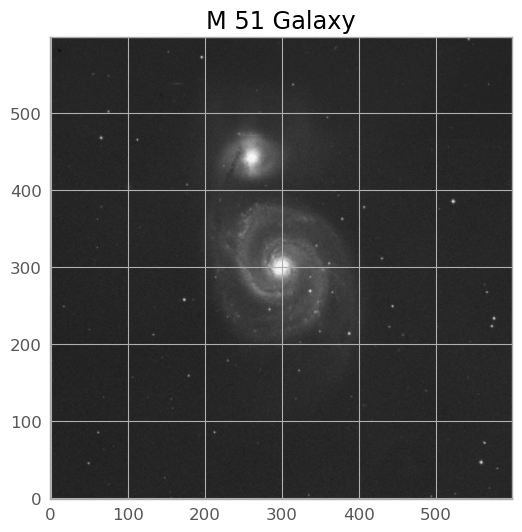

In [11]:
plt.title('M 51 Galaxy')
plt.imshow(data, cmap = 'gray', origin = 'lower')

## **Scaling or Stretch function**

Scaling is used to change the visual appearance of an image, to alter the quantity of information stored in a scene representation, or as a low-level preprocessor in multi-stage image processing chain which operates on features of a particular scale. You choose which “stretch function” or representation to use 

A logarithmic representation of the pixel values tends to suppress the bright parts of the image, i.e. the stars, and to enhance the fainter part, e.g. nebulosity. This can be desirable if the ‘faint stuff’ needs ‘a boost’, but a logarithmic stretch function can also reduce the contrast in an image, producing a lower dynamic range

## Here's an example of sqrt scaling

Text(0.5, 1.0, 'Sqrt scaled M 51 Galaxy.')

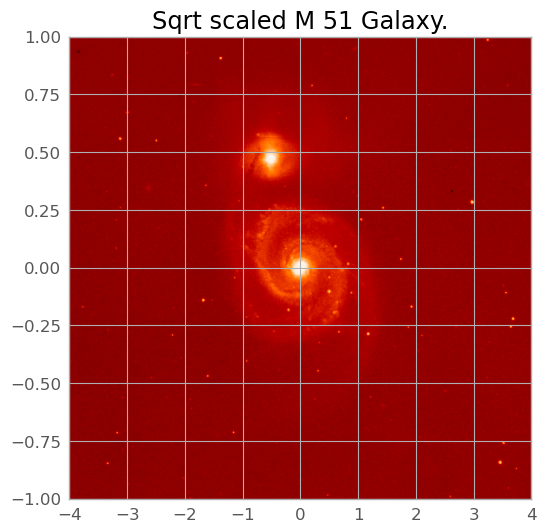

In [12]:
sqrt = np.sqrt(data)

#Displaying sqrt with cmap: gray, origin: lower and tital: Sqrt scaled M 51 Galaxy.

plt.imshow(sqrt, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('Sqrt scaled M 51 Galaxy.')

scale function which takes 2D numpy array and scaling function name as input and returns scaled image. The function have following scaling functions

In [29]:
def scale(data, func='linear'):
  data = data - data.min()  # makes all data Positive
  if func=='linear':
    #Linear.
    return data

  elif func == 'log':
    #Logarithmic [Base 10]. ( Remember log 0 is indefinite, use log( 1+ data) )
    return np.log10(1 + data)
    
  elif func == 'sqrt':
    #Square root.
    return np.sqrt(data)
   
  elif func == 'asinh':
    #asinh
    return np.arcsinh(data)

Text(0.5, 1.0, 'linear scaled M 51 Galaxy.')

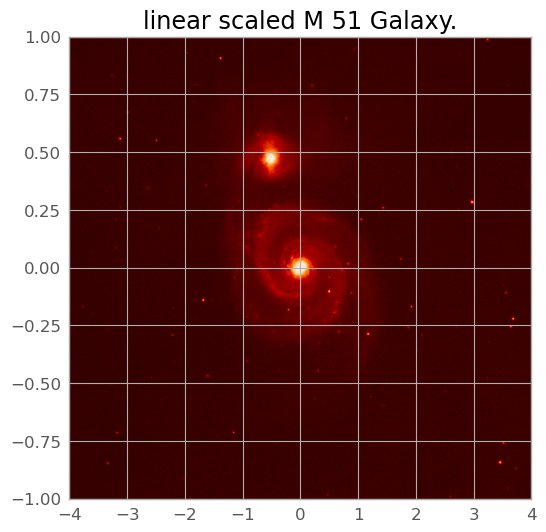

In [27]:
new_data = scale(data, func='linear')

#Displaying linear scaleed with cmap: gray, origin: lower and tital: linear scaled M 51 Galaxy..

plt.imshow(new_data, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('linear scaled M 51 Galaxy.')

Text(0.5, 1.0, 'log scaled M 51 Galaxy.')

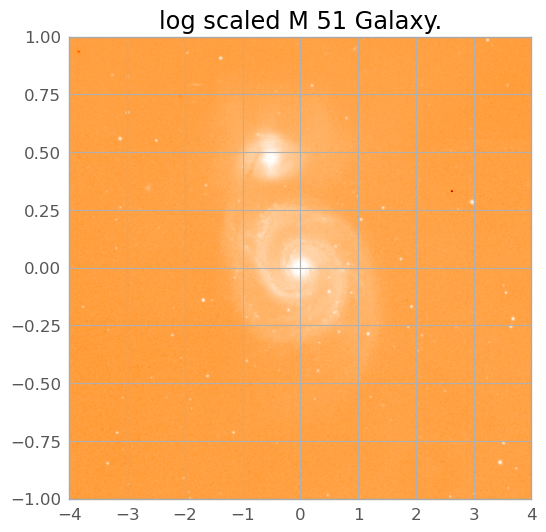

In [30]:
new_data = scale(data, func='log')

#Displaying log scaleed with cmap: gray, origin: lower and tital: log scaled M 51 Galaxy..

plt.imshow(new_data, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('log scaled M 51 Galaxy.')

Text(0.5, 1.0, 'asinh scaled M 51 Galaxy.')

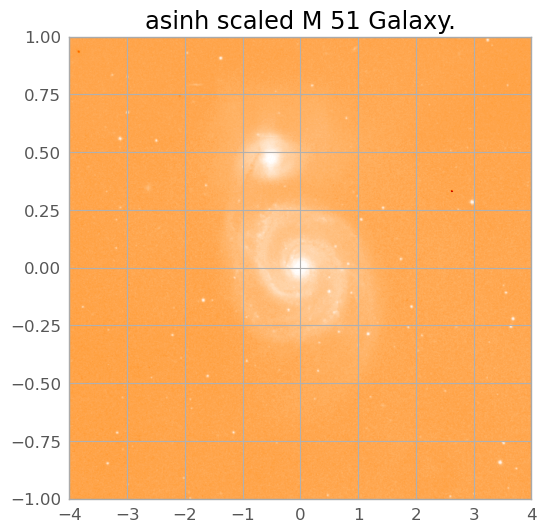

In [28]:
new_data = scale(data, func='asinh')

#Displaying asinh scaleed with cmap: gray, origin: lower and tital: asinh scaled M 51 Galaxy..

plt.imshow(new_data, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('asinh scaled M 51 Galaxy.')

function which takes 2D array and normalization method as input and returns normalized array. The function have following normalization method

1. Normalize data to the range [0,1]. Hint : Use min and max [Learn more](https://en.wikipedia.org/wiki/Normalization_(statistics))
2. Normalize data using mean and standard deviation

In [15]:
def norm(data, func = 'norm1'):
    if func == 'norm1':
        min_data = np.min(data)
        max_data = np.max(data)
        return (data - min_data)/(max_data - min_data)
    
    elif func == 'norm2':
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std

Text(0.5, 1.0, 'norm1 normalizased M 51 Galaxy.')

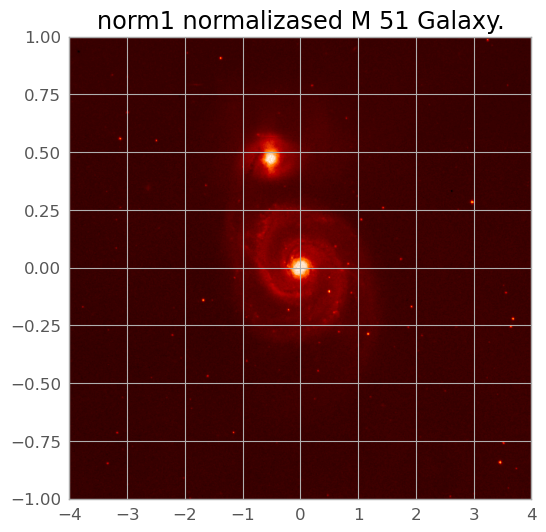

In [31]:
new_data = norm(data)

#Displaying norm1 with cmap: gray, origin: lower and tital: norm1 normalizased M 51 Galaxy..

plt.imshow(new_data, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('norm1 normalizased M 51 Galaxy.')

Text(0.5, 1.0, 'norm2 normalizased M 51 Galaxy.')

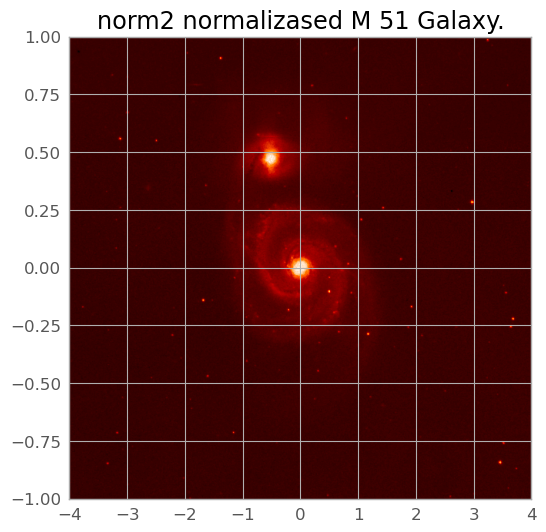

In [25]:
new_data = norm(data, 'norm2')

#Displaying norm2 with cmap: gray, origin: lower and tital: norm2 normalizased M 51 Galaxy..

plt.imshow(new_data, origin = 'lower', extent = [-4, 4, -1, 1], aspect = 4)
plt.title('norm2 normalizased M 51 Galaxy.')